<a href="https://colab.research.google.com/github/Harishankarvel/LAUN_ML_project/blob/main/Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset 'ODI.csv' loaded successfully.

--- India's Annual ODI Win Percentage (1974-2023) ---
 Year  Matches_Played  Matches_Won  Win_Percentage
 1974               1            0            0.00
 1975               3            1           33.33
 1976               2            0            0.00
 1978               3            1           33.33
 1979               2            0            0.00
 1980               5            3           60.00
 1981               9            1           11.11
 1982               9            5           55.56
 1983              18            8           44.44
 1984              11            2           18.18
 1985              15            9           60.00
 1986              27           12           44.44
 1987              22           12           54.55
 1988              20           12           60.00
 1989              18            4           22.22
 1990              13            6           46.15
 1991              14            8     

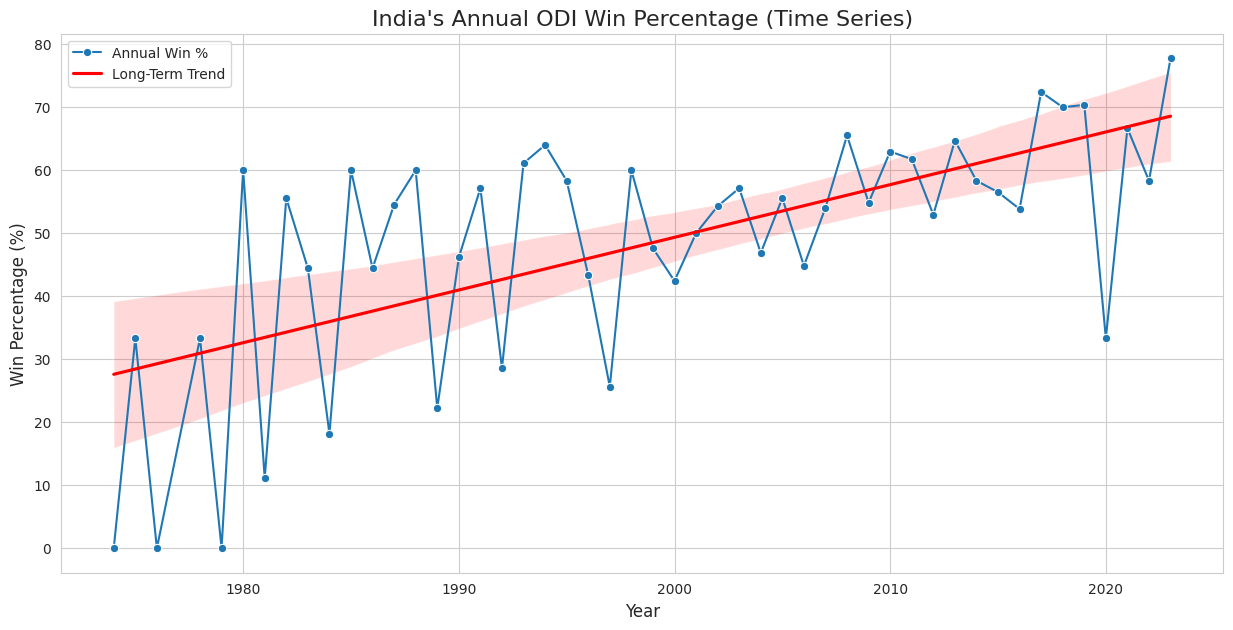

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

try:
    df_raw = pd.read_csv('ODI.csv')
    print("Dataset 'ODI.csv' loaded successfully.\n")
except FileNotFoundError:
    print("ERROR: 'ODI.csv' not found. Please upload the file to your Colab session.")
    exit()

df_raw.rename(columns={'Team_1': 'Team 1', 'Team_2': 'Team 2'}, inplace=True)
df_raw['Date'] = pd.to_datetime(df_raw['Match Date'], errors='coerce')
df_raw.dropna(subset=['Date', 'Winner', 'Team 1', 'Team 2'], inplace=True)
df_raw['Year'] = df_raw['Date'].dt.year

df_india = df_raw[(df_raw['Team 1'] == 'India') | (df_raw['Team 2'] == 'India')].copy()
df_india['India_Won'] = (df_india['Winner'] == 'India').astype(int)

annual_stats = df_india.groupby('Year').agg(
    Matches_Played=('Date', 'count'),
    Matches_Won=('India_Won', 'sum')
).reset_index()

annual_stats['Win_Percentage'] = (annual_stats['Matches_Won'] / annual_stats['Matches_Played']) * 100

print("--- India's Annual ODI Win Percentage (1974-2023) ---")
print(annual_stats.to_string(index=False, float_format='%.2f'))

print("\nGenerating time series plot...")

sns.set_style("whitegrid")
plt.figure(figsize=(15, 7))

sns.lineplot(
    x='Year',
    y='Win_Percentage',
    data=annual_stats,
    marker='o',
    label='Annual Win %'
)

sns.regplot(
    x='Year',
    y='Win_Percentage',
    data=annual_stats,
    scatter=False,
    color='red',
    label='Long-Term Trend'
)

plt.title("India's Annual ODI Win Percentage (Time Series)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Win Percentage (%)", fontsize=12)
plt.legend()
plt.show()